In [2]:

%pip install psycopg2

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: psycopg2 in c:\users\lomah\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages (2.9.9)




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\lomah\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:


import os
import psycopg2
import getpass

# Input credentials in a hidden manner
hostname = input("Enter the hostname: ")
database = input("Enter the database name: ")
username = input("Enter the username: ")
pwd = getpass.getpass("Enter the password: ")  # Password will be hidden
port_id = input("Enter the port (default 5432): ") or "5432"

# Connect to the database
try:
    conn = psycopg2.connect(
        host=hostname,
        dbname=database,
        user=username,
        password=pwd,
        port=port_id
    )
    print("Connected to the database successfully")
except Exception as e:
    print(f"Error: {e}, try connecting again")


Connected to the database successfully


In [7]:
try:
  cur=conn.cursor()

  query = "SELECT size FROM product"
  cur.execute(query)
  data = cur.fetchall()
  df = pd.DataFrame(data, columns=["size"])
  mode_value = df['size'].mode()[0]
  print(f"Mode of size column: {mode_value}")
  update_query = """
    UPDATE product
    SET size = %s
    WHERE size IS NULL
"""
  cur.execute(update_query, (mode_value,))

  conn.commit()
  print("Null values in the 'size' column have been replaced with the mode.")
except Exception as e:
    print(f"{e} ,try connecting again")
else:
   print("Query has been executed successfully")

Mode of size column: 44
Null values in the 'size' column have been replaced with the mode.
Query has been executed successfully


In [8]:
try:
  cur=conn.cursor()

  query = "SELECT color FROM product"
  cur.execute(query)
  data = cur.fetchall()
  df = pd.DataFrame(data, columns=["color"])
  mode_value = df['color'].mode()[0]
  print(f"Mode of color column: {mode_value}")
  update_query = """
    UPDATE product
    SET color = %s
    WHERE color IS NULL
"""
  cur.execute(update_query, (mode_value,))

  conn.commit()
  print("Null values in the 'color' column have been replaced with the mode.")
except Exception as e:
    print(f"{e} ,try connecting again")
else:
   print("Query has been executed successfully")

Mode of color column: Black
Null values in the 'color' column have been replaced with the mode.
Query has been executed successfully


In [9]:
try:
  cur=conn.cursor()
  
  query = "SELECT weight FROM product"
  cur.execute(query)
    
  data = cur.fetchall()
  df = pd.DataFrame(data, columns=["weight"])

  average_value = df['weight'].mean()
  print(f"Average of weight column: {average_value}")

  update_query = """
        UPDATE product
        SET weight = %s
        WHERE weight IS NULL
    """
  cur.execute(update_query, (average_value,))

  conn.commit()
  print("Null values in the 'weight' column have been replaced with the average.")
except Exception as e:
    print(f"{e} ,try connecting again")
else:
   print("Query has been executed successfully")

Average of weight column: 5483.707050847458
Null values in the 'weight' column have been replaced with the average.
Query has been executed successfully


C:\Users\lomah\AppData\Local\Temp\ipykernel_15192\329391984.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='branch_count', data=df, palette="Blues_d")


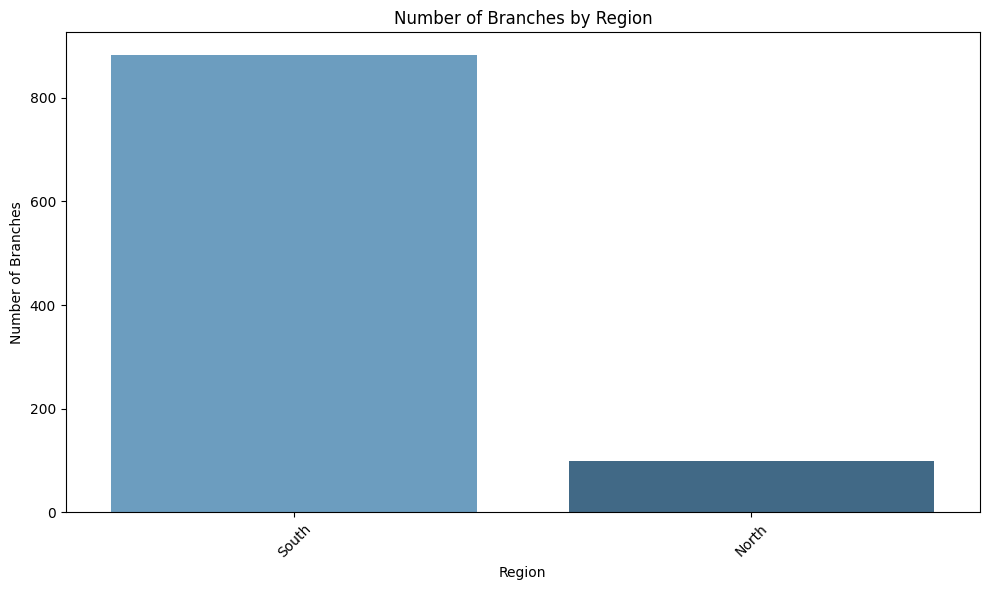

In [10]:
query = "SELECT region, COUNT(id) as branch_count FROM branch GROUP BY region"
cur.execute(query)
    
data = cur.fetchall()
df = pd.DataFrame(data, columns=["region", "branch_count"])

plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='branch_count', data=df, palette="Blues_d")
    
plt.title('Number of Branches by Region')
plt.xlabel('Region')
plt.ylabel('Number of Branches')
plt.xticks(rotation=45)  # Rotate the region labels if necessary
plt.tight_layout()

plt.show()

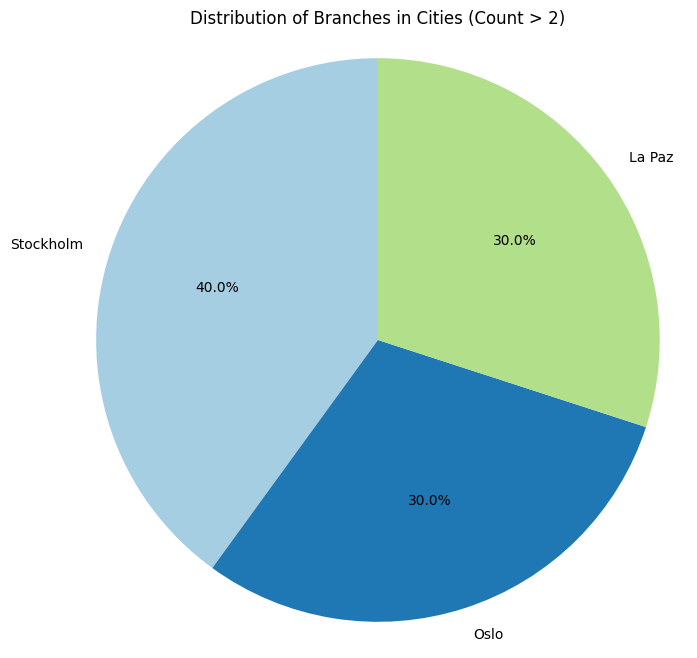

Query has been executed successfully


In [11]:
try:
  
  query = """
          SELECT city, COUNT(id) as branch_count
          FROM branch
          GROUP BY city
          HAVING COUNT(id) > 2
          ORDER BY branch_count DESC
      """
  cur.execute(query)
      
  data = cur.fetchall()
  df = pd.DataFrame(data, columns=["city", "branch_count"])

  plt.figure(figsize=(8, 8))
  plt.pie(df['branch_count'], labels=df['city'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

  plt.title('Distribution of Branches in Cities (Count > 2)')
  plt.axis('equal')    
    
  plt.show()
except Exception as e:
    print(f"{e} ,try connecting again")
else:
   print("Query has been executed successfully")

C:\Users\lomah\AppData\Local\Temp\ipykernel_15192\1602847673.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_count', y='category_name', data=df, palette="viridis")


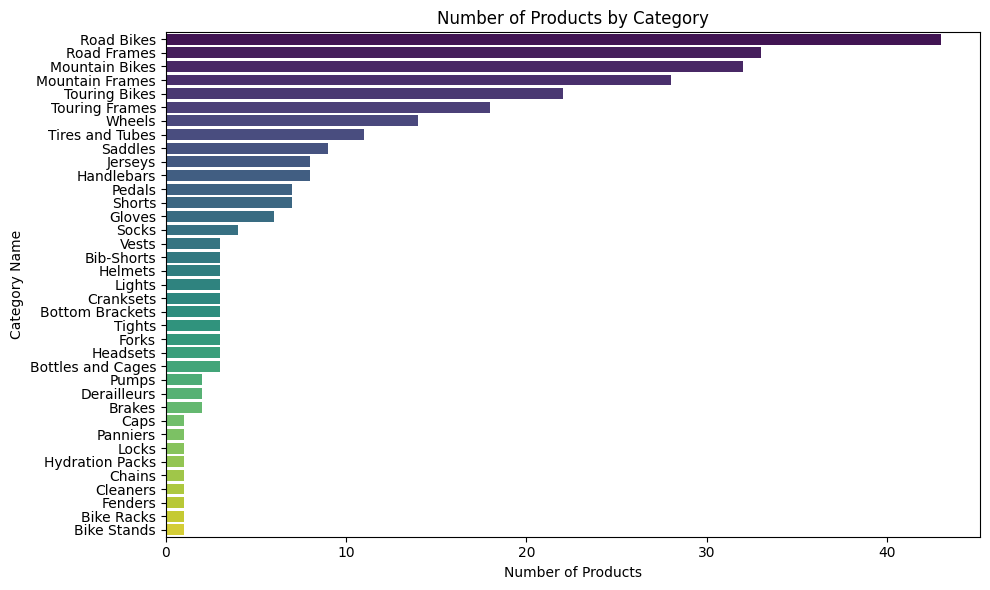

Query has been executed successfully


In [12]:
try:
    # Start a new transaction and execute the query
    query = """
        SELECT category_name, COUNT(productid) as product_count
        FROM product
        GROUP BY category_name
        ORDER BY product_count DESC
    """
    cur.execute(query)

    # Fetch all the data
    data = cur.fetchall()

    # Convert the data into a DataFrame
    df = pd.DataFrame(data, columns=["category_name", "product_count"])

    # Plot the data using Seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='product_count', y='category_name', data=df, palette="viridis")

    plt.title('Number of Products by Category')
    plt.xlabel('Number of Products')
    plt.ylabel('Category Name')
    plt.tight_layout()

    plt.show()

    # Commit the transaction
    conn.commit()

except Exception as e:
    # Roll back the transaction in case of an error
    conn.rollback()
    print(f"Error: {e}, try connecting again")

else:
    print("Query has been executed successfully")


In [13]:
cur.close()
conn.close()